In [43]:
import os
import glob
import pandas as pd
os.chdir('C:\\Users\\jaeko')

In [1]:
%pwd

'C:\\Users\\jaeko'

In [44]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)

['team_cleansheets.csv', 'team_expenditures.csv', 'team_goals.csv', 'team_interception.csv', 'team_losses.csv', 'team_passes.csv', 'team_shots.csv', 'team_tackles.csv', 'team_wins.csv']


In [45]:
d = {'arsenal':100, 'chelsea':11}
l = [100, 11]
print('from dict: ' + str(d['chelsea']))
print('from list: ' + str(l[1]))

from dict: 11
from list: 11


In [54]:

dfs = {f:pd.read_csv(f) for f in all_filenames}

def clean_club_name(x):
    """ remove 'FC' and 'AFC' from Team names because sometimes
    a data set has FC, and other times it doesn't. We need all 
    the team names to be consistent accross data sets, and we 
    chose to remove these suffixes and prefixes from ALL team 
    names.
    """
    x = x.replace('AFC', '').replace('FC', '').strip()
    return(x)
for df in dfs.values():
    if 'Club' in df.columns:
        
        df.rename(columns={'Club':'TeamName'}, inplace=True)
    if 'Rank' in df.columns:
       
        del df['Rank']
    df['TeamName'] = df['TeamName'].apply(clean_club_name)  
    
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted; and add
    zeros for 'bn' or 'm' for billions or millions, respectively
    """
    if isinstance(x, str):
        x = x.replace('$', '').replace(',', '').replace('.','')
        x = x.replace('bn','0000000').replace('m','0000')
        return(x)
    return(x)
df = dfs['team_expenditures.csv']
df['Expenditure'] = df['Expenditure'].apply(clean_currency).astype('int64')
df['Income'] = df['Income'].apply(clean_currency).astype('int')

In [55]:

combined = dfs['team_expenditures.csv']

for fn, df in dfs.items():
   
    if fn=='team_expenditures.csv':
        continue
  
    combined = pd.merge(combined, df, on='TeamName', how='left')


In [58]:
print(combined.dtypes)
combined

#                 int64
TeamName         object
Competition      object
Expenditure       int64
Arrivals          int64
Income            int32
Departures        int64
Clean Sheets    float64
Goals           float64
Interception    float64
Losses          float64
Passes          float64
Shots           float64
Tackles         float64
Wins            float64
dtype: object


,#,TeamName,Competition,Expenditure,Arrivals,Income,Departures,Clean Sheets,Goals,Interception,Losses,Passes,Shots,Tackles,Wins
0,1,Chelsea,Premier League,2380000000,623,1300000000,608,425.0,1813.0,6645.0,231.0,268724.0,8896.0,10244.0,570.0
1,2,Manchester City,Premier League,2300000000,611,692340000,597,285.0,1439.0,7153.0,267.0,276375.0,8355.0,10157.0,407.0
2,3,Manchester United,Premier League,2070000000,477,817920000,484,449.0,2025.0,7193.0,174.0,266316.0,8099.0,10062.0,657.0
3,4,Liverpool,Premier League,1780000000,507,1140000000,504,405.0,1834.0,6700.0,247.0,269870.0,8832.0,11236.0,553.0
4,5,Tottenham Hotspur,Premier League,1440000000,570,963320000,575,298.0,1587.0,7609.0,343.0,245955.0,8240.0,10518.0,456.0
5,6,Arsenal,Premier League,1350000000,454,821510000,454,406.0,1877.0,8017.0,219.0,278941.0,8085.0,10324.0,571.0
6,7,Everton,Premier League,1060000000,439,698730000,430,327.0,1388.0,7080.0,375.0,214070.0,6988.0,9981.0,386.0
7,8,Newcastle United,Premier League,1030000000,506,694830000,497,248.0,1273.0,6323.0,350.0,167851.0,5496.0,8829.0,354.0
8,9,Aston Villa,Premier League,872800000,509,428040000,511,272.0,1149.0,6244.0,347.0,147433.0,4878.0,8520.0,323.0
9,10,West Ham United,Premier League,867390000,620,586270000,606,239.0,1094.0,6487.0,377.0,180224.0,6132.0,9358.0,296.0


In [66]:
combined.to_csv('combined.csv', index=False, encoding='utf-8')

In [59]:

dfs['team_wins.csv']

,TeamName,Wins
0,Manchester United,657
1,Arsenal,571
2,Chelsea,570
3,Liverpool,553
4,Tottenham Hotspur,456
5,Manchester City,407
6,Everton,386
7,Newcastle United,354
8,Aston Villa,323
9,West Ham United,296


In [60]:
dfs.keys() 

dict_keys(['team_cleansheets.csv', 'team_expenditures.csv', 'team_goals.csv', 'team_interception.csv', 'team_losses.csv', 'team_passes.csv', 'team_shots.csv', 'team_tackles.csv', 'team_wins.csv'])

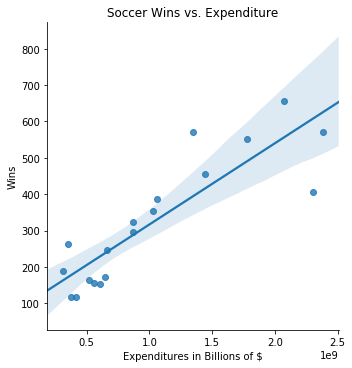

In [67]:

import seaborn as sns
from matplotlib import pyplot as plt
fig = sns.lmplot(x='Expenditure', y='Wins', data=combined, fit_reg=True)
ax = plt.gca()
ax.set_title("Soccer Wins vs. Expenditure")
fig.set_axis_labels('Expenditures in Billions of $', 'Wins')
fig.savefig("soccerwinsvsexpenditure.png")

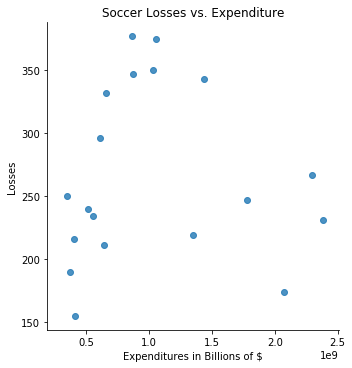

In [68]:
fig = sns.lmplot(x='Expenditure', y='Losses', data=combined, fit_reg=False)
ax = plt.gca()
ax.set_title("Soccer Losses vs. Expenditure")
fig.set_axis_labels('Expenditures in Billions of $', 'Losses')
fig.savefig("soccerlossesvsexpenditure.png")

In [63]:
data = combined.copy()
drop = ['#', 'TeamName', 'Competition']
for d in drop:
    del data[d]

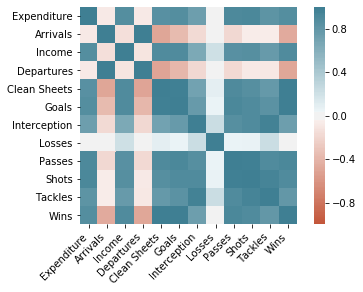

In [79]:

import matplotlib.pyplot as plt
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_ylim(len(data.columns), 0)
plt.savefig('C:\\Users\\jaeko/soccer_heat_map.png')
plt.show()

In [80]:
  
corr.style.background_gradient(cmap='coolwarm')

corr.style.background_gradient(cmap='coolwarm').set_precision(2)



,Expenditure,Arrivals,Income,Departures,Clean Sheets,Goals,Interception,Losses,Passes,Shots,Tackles,Wins
Expenditure,1,-0.074,0.87,-0.072,0.85,0.87,0.74,0.0072,0.91,0.92,0.82,0.87
Arrivals,-0.074,1,-0.14,0.99,-0.49,-0.37,-0.16,0.027,-0.18,-0.051,-0.053,-0.47
Income,0.87,-0.14,1,-0.11,0.89,0.9,0.65,0.21,0.85,0.86,0.77,0.89
Departures,-0.072,0.99,-0.11,1,-0.5,-0.38,-0.18,0.01,-0.17,-0.078,-0.081,-0.48
Clean Sheets,0.85,-0.49,0.89,-0.5,1,0.98,0.72,0.094,0.9,0.86,0.79,0.99
Goals,0.87,-0.37,0.9,-0.38,0.98,1,0.77,0.053,0.93,0.89,0.84,0.99
Interception,0.74,-0.16,0.65,-0.18,0.72,0.77,1,0.24,0.86,0.9,0.96,0.73
Losses,0.0072,0.027,0.21,0.01,0.094,0.053,0.24,1,0.059,0.066,0.24,0.039
Passes,0.91,-0.18,0.85,-0.17,0.9,0.93,0.86,0.059,1,0.98,0.89,0.92
Shots,0.92,-0.051,0.86,-0.078,0.86,0.89,0.9,0.066,0.98,1,0.95,0.88


In [81]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [82]:
combined.columns

Index(['#', 'TeamName', 'Competition', 'Expenditure', 'Arrivals', 'Income',
       'Departures', 'Clean Sheets', 'Goals', 'Interception', 'Losses',
       'Passes', 'Shots', 'Tackles', 'Wins'],
      dtype='object')